In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/jayka/Videos/Machine-Learning/wine-quality-data/winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [5]:
def initial_observation(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))
                  
                       
              

In [6]:
initial_observation(df)

Dimensions : 1599 rows, 12 columns
Total NA Values : 0 
                           Column Name  Data Type      #Distinct  NA Values
                         fixed acidity    float64           96          0
                      volatile acidity    float64          143          0
                           citric acid    float64           80          0
                        residual sugar    float64           91          0
                             chlorides    float64          153          0
                   free sulfur dioxide    float64           60          0
                  total sulfur dioxide    float64          144          0
                               density    float64          436          0
                                    pH    float64           89          0
                             sulphates    float64           96          0
                               alcohol    float64           65          0
                               quality      int64     

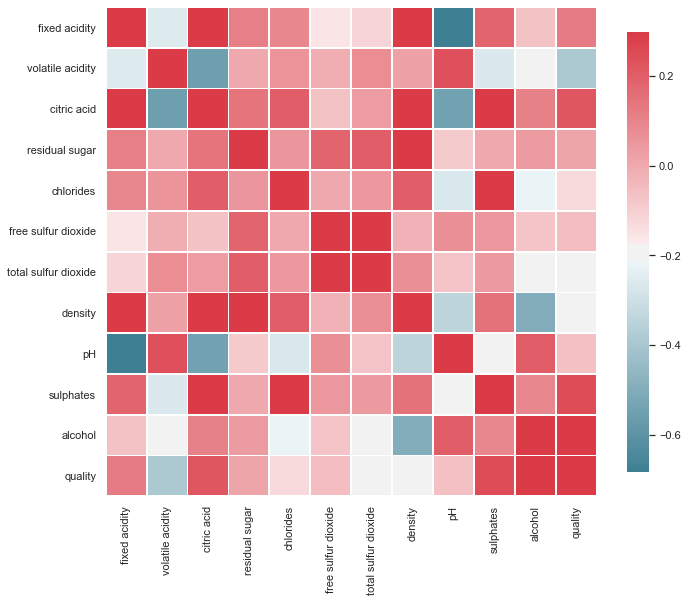

In [7]:
# Correlation matrix - linear relation among independent attributes and with the Target attribute

sns.set(style="white")

# Compute the correlation matrix
correln = df.corr()

# Generate a mask for the upper triangle
#mask = np.zeros_like(correln, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correln,  cmap=cmap, vmax=.3, #mask=mask,
            linewidths=.8, cbar_kws={"shrink": .9})

C:\Users\jayka\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


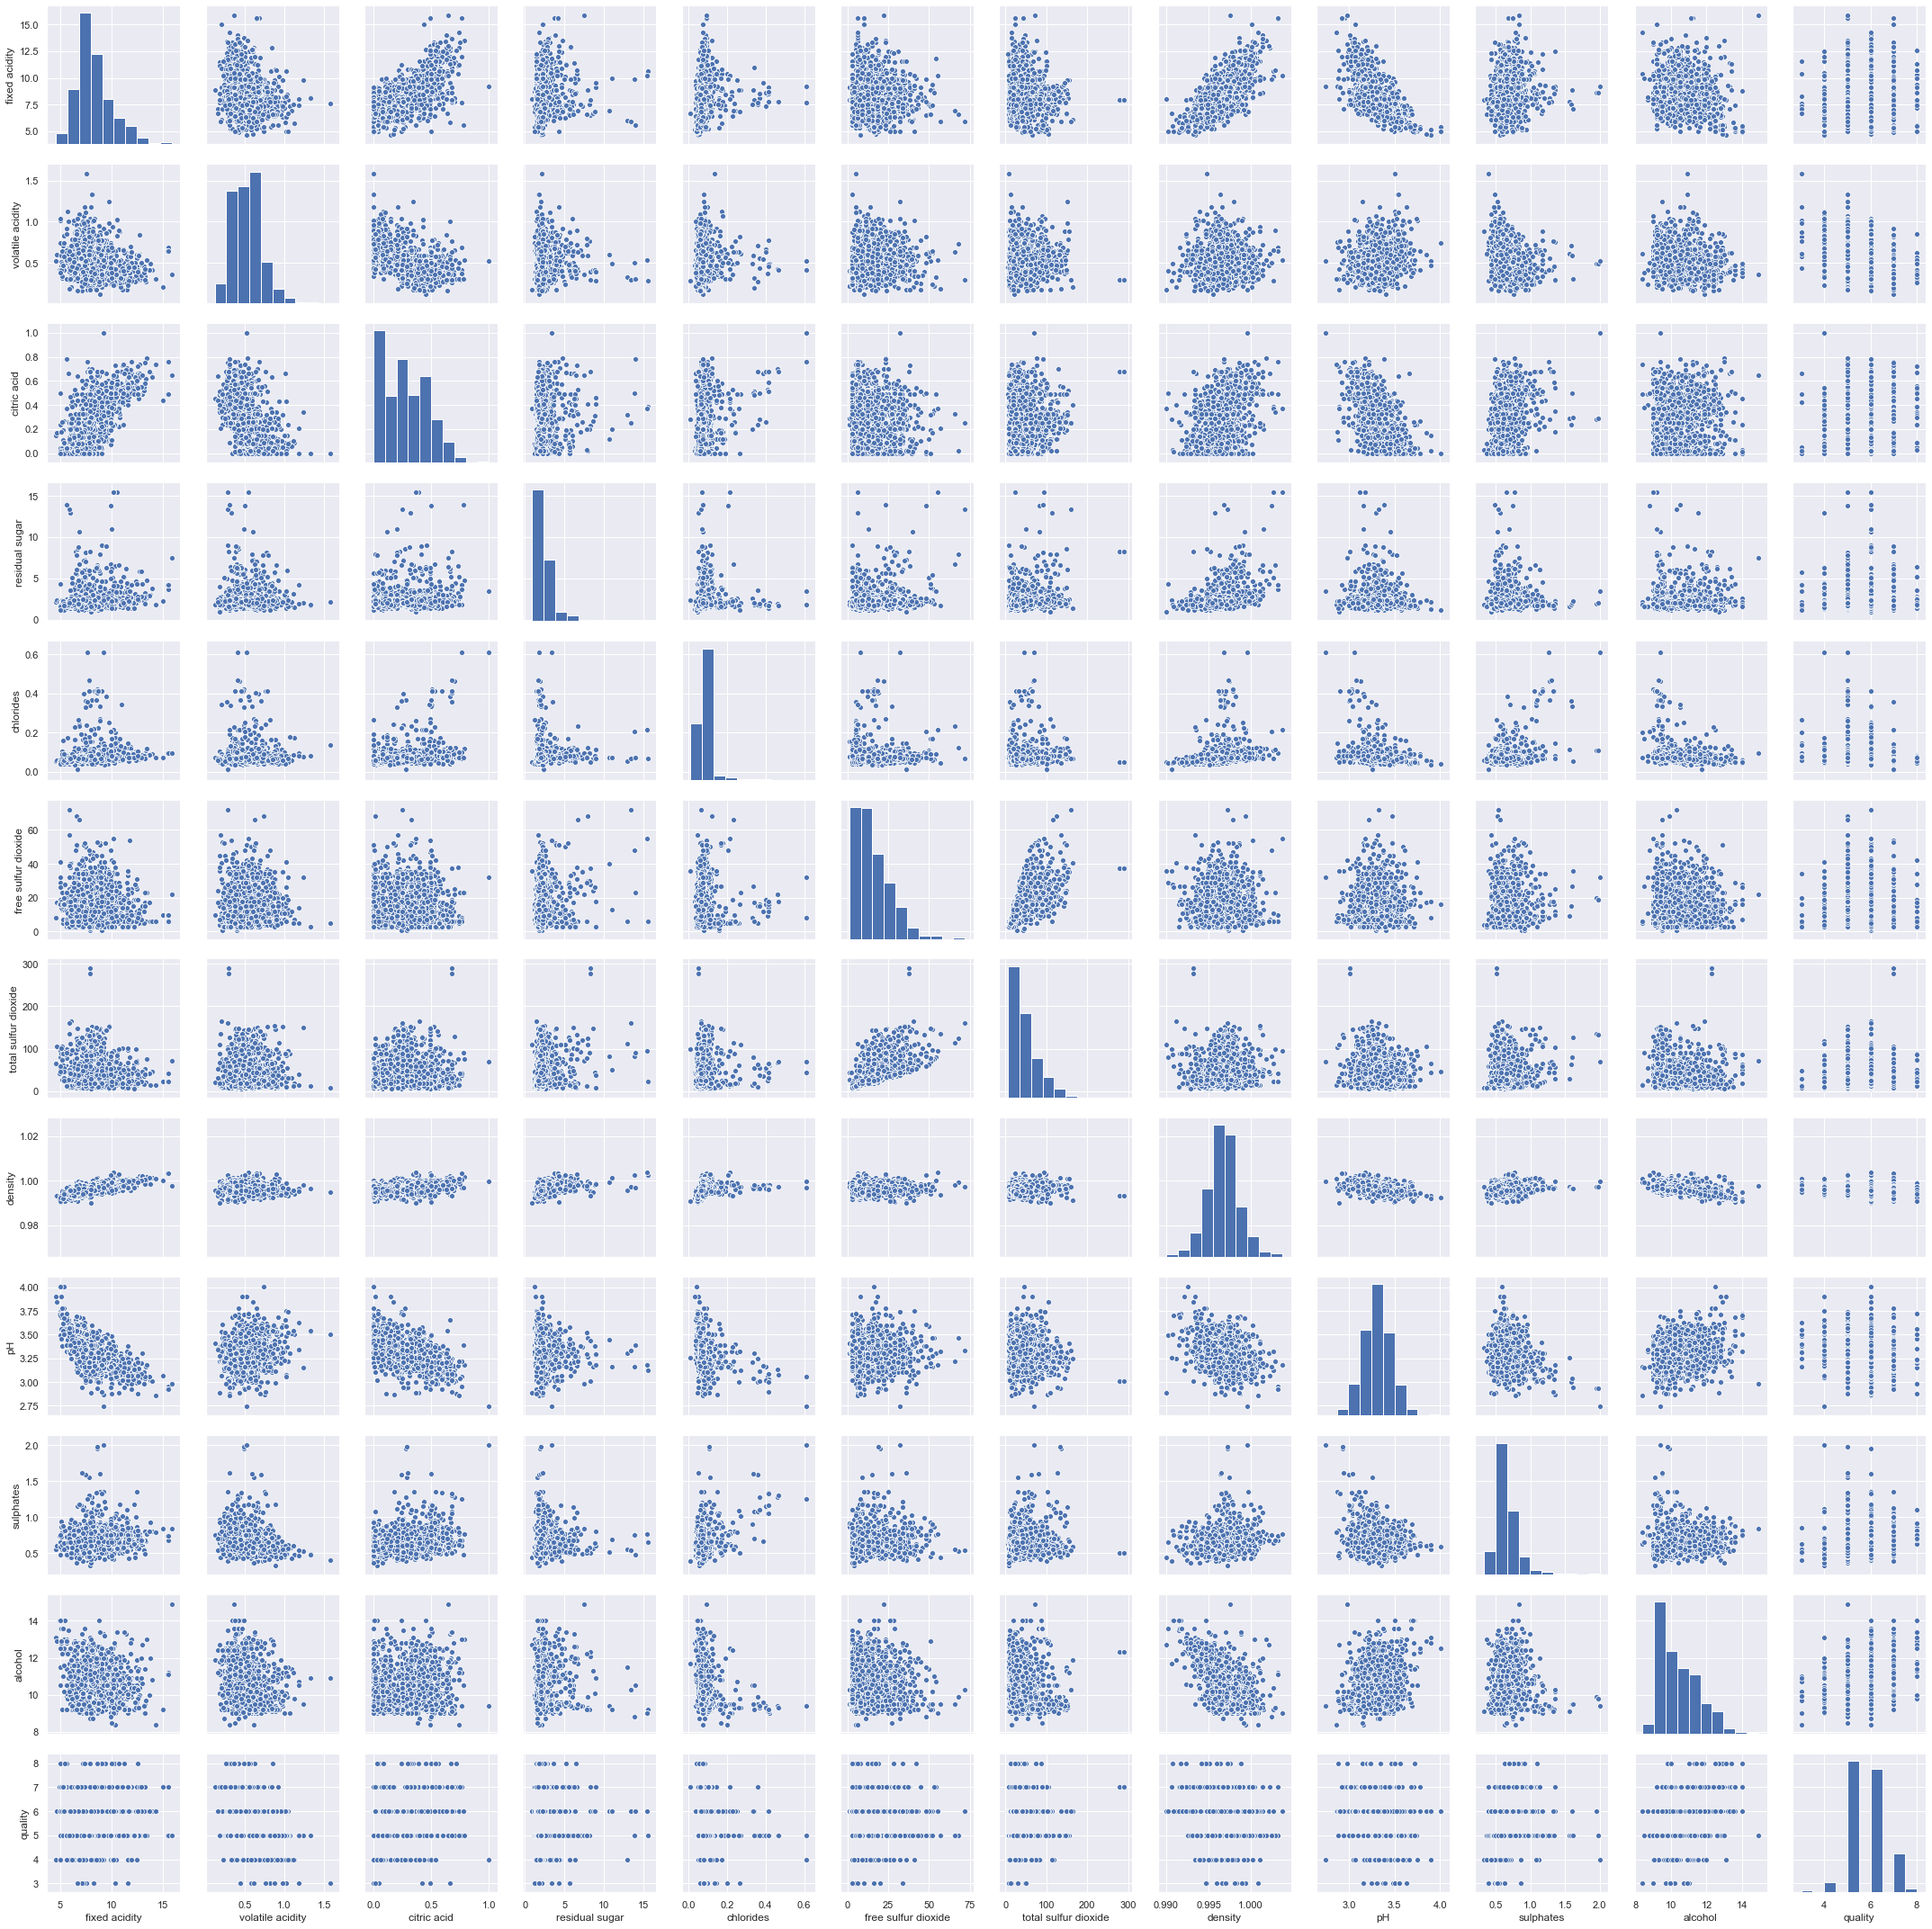

In [8]:
sns.set()
sns.pairplot(df, size = 2.5)
plt.show()

In [9]:
df["alcohol"].describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

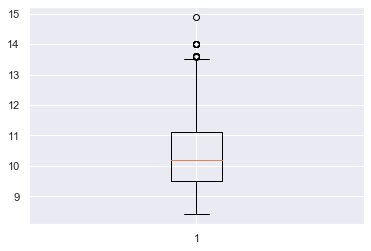

In [10]:
plt.boxplot(df["alcohol"])
plt.show()

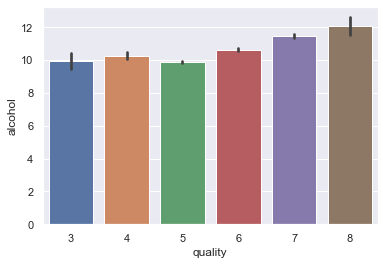

In [11]:
sns.barplot(df["quality"], df["alcohol"])

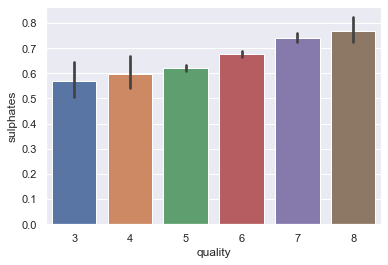

In [12]:
sns.barplot(df["quality"], df["sulphates"])

In [13]:
x = df.drop(["quality"], axis = 1)
y = df["quality"]

In [14]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [15]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x,y)

In [17]:
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_scaled)
x_train_scaled_1 = scaler.transform(X_train_scaled)
x_val_scaled_1 = scaler.transform(X_val_scaled)

In [18]:
print("X Train shape:" , X_train.shape)
print("X Validation shape:" ,   X_val.shape)
print("Y Train shape:",     Y_train.shape)
print( "Y Validation Shape:",   Y_val.shape)


X Train shape: (1199, 11)
X Validation shape: (400, 11)
Y Train shape: (1199,)
Y Validation Shape: (400,)


### Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [20]:
rf_parm = dict(n_estimators = [20, 30, 50, 70, 100, 150], max_features = [0.1, 0.2, 0.6, 0.9], max_depth = [10,20,30],min_samples_leaf=[1,10,100, 400, 500, 600],random_state=[0])

In [21]:
rc = RandomForestRegressor()
rf_grid = GridSearchCV(estimator = rc, param_grid = rf_parm)

In [22]:
rf_grid.fit(x_train_scaled_1,Y_train)

C:\Users\jayka\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [10, 20, 30],

In [28]:
rf_grid.best_score_

0.4452718621322788

In [29]:
rf_grid.best_params_

{'max_depth': 30,
 'max_features': 0.6,
 'min_samples_leaf': 1,
 'n_estimators': 150,
 'random_state': 0}

In [30]:
rc_best = RandomForestRegressor(n_estimators = 30,  max_features = 0.2)

In [31]:
rc_best.fit(x_train_scaled_1, Y_train)
rc_tr_pred = rc_best.predict(x_train_scaled_1)
rc_val_pred = rc_best.predict(x_val_scaled_1)

In [32]:
from sklearn.metrics import r2_score

print(r2_score(Y_train, rc_tr_pred))
print(r2_score(Y_val, rc_val_pred))

0.9198397783632092
0.47242419143698255


In [34]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(random_state = 42)
gbrt_grid = GridSearchCV(estimator = gbrt, param_grid = dict(n_estimators = [2, 3, 5, 7, 10, 15, 20, 25], max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], learning_rate = [0.001, 0.0001, 0.01, 0.1, 1, 100]))

In [35]:
gbrt_grid.fit(x_train_scaled_1, Y_train)

C:\Users\jayka\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\jayka\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n...None,
                        

In [36]:
print("Best Boosting Parameters:", gbrt_grid.best_params_)
print("Best Boosting Score:", gbrt_grid.best_score_)

Best Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 25}
Best Boosting Score: 0.4034559037764277


In [37]:
gbrt_best = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 6, n_estimators = 25, random_state = 42)
gbrt_best.fit(x_train_scaled_1, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=25,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [38]:
gbrt_best_tr_pred = gbrt_best.predict(x_train_scaled_1)
gbrt_best_val_pred = gbrt_best.predict(x_val_scaled_1)

In [39]:
from sklearn.metrics import r2_score

print(r2_score(Y_train, gbrt_best_tr_pred))
print(r2_score(Y_val, gbrt_best_val_pred))

0.7882870774193402
0.4121987111877846
